## Scenario given:
SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners. Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

### Dataset: SportsStats (Olympics Dataset - 120 years of data),  formatted as a csv file. The data is structured along 15 columns and 271116 rows.
#### Understanding the information in the "athlete_events.csv" dataset:
**1.** **ID** - Integer number, to uniquely identify an athlete in the dataset.
<br>
**2.** **Name** - Names of the athletes in the dataset.
<br>
**3 - 6.** **Sex, Age, Height, Weight** - The demographic and physical characteristics of the athletes in the dataset.
<br>
**7.** **Team** - Which countries the athletes in the dataset represent.
<br>
**8.** **NOC** - Acronyms for National Olympic Committees, for specific countires.
<br>
**9.** **Games** - Olympic sessions on which an athlete has participated in.
<br>
**10.** **Year** - Year of a particular Olympics session.
<br>
**11.** **Season** - Seasonal splits between summer and winter Olympic events.
<br>
**12.** **City** - In which city has a particular Olympics Season has been organized.
<br>
**13 - 14.** **Sport and Event** - Particular sporting disipline and the event's name where an athlete has participated.
<br>
**15.** **Medal** - List showing whether an athlete has won a medal or not, for each medal category (gold, silver, bronze).

### Project's use cases:
Given the chosen dataset, this analysis could provide useful insights to any sports enthusiasts, analysts, researchers, teams, and businesses.
<br>
Some of the use cases would be the following:
<br>

**1.** **Player and Team Performance Evaluation**
<br>
 - From the analysis, coaches and team managers can use the insights to evaluate player and team performance, identify strengths and weaknesses, and make informed decisions on strategies, training, and game plans.
<br>

**2.** **Sponsorship and Marketing**
<br>
 - Sports teams, organizations, and sponsors use data to evaluate the impact of sponsorships, marketing campaigns, and fan engagement initiatives. Therefore, the analysis might help them in making data-driven decisions for future partnerships and promotions
 <br>
 
**3.** **Broadcasting and Media**
<br>
 - Media companies use sports data to enhance sports broadcasts. This can include creating informative graphics regarding athlete performance, team statistics, and historical trends.
<br>

Given these use cases, my analysis will be based on athlete's particularities, such as age, weight, height, sex and country of origin, and see how they influence his or her performance.
<br>
Considering the dataset contains of **sport events records between 1896 and 2016**, it will be interesting to see how the performance of the athletes increases or decreases over time.

### Preliminary questions to answer:
**1. How many male vs. female athletes are there?**
<br>
**2. How many medals have been awarded to athletes?**
<br>
**3. How many medals has each category received?**
<br>
**4. How many athletes have competed in winter events compared to summer events?**
<br>
**5. How many sports are there, comparing winter and summer events?**
<br>
**6. How many teams have registered for winter/summer events?**
***
### Initial hypotheses:
1. There are more male athletes than female.
2. The overall athlete performance has improved over the analyzed period, in terms of medals won.
3. Younger athletes tend to win more medals than their older adversaries.
***
### Considering the above hypothesis, my analysis will focus on the following:

**Gender Distribution**:
<br>
Analyze the gender distribution of athletes over the years. Understand the number of male and female athletes participating in different sports and events. Explore if there are specific sports or disciplines where one gender dominates.

**Performance Trends:**
<br>
Examine the overall performance of athletes in terms of medals won across different years. Identify sports or events where there is a significant increase or decrease in the number of medals awarded. Look for patterns or trends in the performance of athletes over time.

**Age and Medal Count:**
<br>
Investigate the relationship between athlete age and the number of medals won. Analyze whether younger athletes tend to perform better than older athletes. Break down the analysis by sports and events to identify any age-related trends within specific disciplines.
***
In order to achieve this, my analysis will be based on various visualization techniques, such as line charts, bar graphs and scatter plots, to effectively communicate the trends and patterns observed in the dataset.

In [1]:
# Import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from pandasql import sqldf

# Define a function for executing SQL queries
pysqldf = lambda q: sqldf(q, globals())

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set the option to have all the columns displayed in the dataframe
pd.set_option("display.max_columns", None)

### Initial Exploratory Data Analysis (EDA)

In [2]:
# Import the csv file into a dataframe:
df_athletes = pd.read_csv("athlete_events.csv")

In [3]:
# Check the dataframe
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Brief summary of the dataframe:
df_athletes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# Brief descriptive statistics of the dataframe
df_athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# Checking for any missing values and summing them up.
df_athletes.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df_athletes.isna().sum().sum()

363853

There are 363,853 total missing values in this dataset. The absence of demographic and physical characteristics for some athletes might have a negative impact on the accuracy of the analysis when answering certain athlete-specific questions.

### 1. How many male vs. female athletes are there?

In [8]:
# Group the dataframe into males and females:
df_mvf = df_athletes["Sex"].groupby(df_athletes["Sex"]).count()
df_mvf

Sex
F     74522
M    196594
Name: Sex, dtype: int64

In [9]:
# Now calculate the ratio of males vs. female athletes:
df_ratio = df_mvf / df_mvf.sum()
print(df_ratio)

Sex
F    0.274871
M    0.725129
Name: Sex, dtype: float64


Given these numbers, we can see that approximately 72.5% of the athlete participants are male, and approximately 27.5% are female. It is worth noting that it is very likely to have an athlete showing more than once in this dataset since he or she can participate in multiple Olympic events over the years. Therefore, it's worth looking at how many unique athletes have been recorded in the analyzed period.

In [10]:
# Check for multiple entries for the athletes
df_check = df_athletes.groupby(df_athletes["Name"]).count()
df_check

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,,,,,,,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",1,1,1,1,0,1,1,1,1,1,1,1,1,0
Eleonora Margarida Josephina Scmitt,2,2,2,0,0,2,2,2,2,2,2,2,2,0
Jean Hauptmanns,1,1,1,0,0,1,1,1,1,1,1,1,1,0
Luis ngel Fernando de los Santos Grossi,5,5,5,0,0,5,5,5,5,5,5,5,5,0
Th Anh,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Krdar emberci,1,1,1,1,1,1,1,1,1,1,1,1,1,0
zlem Kaya,2,2,2,2,2,2,2,2,2,2,2,2,2,0
zman Graud,1,1,1,1,1,1,1,1,1,1,1,1,1,0


#### This clearly indicates that an athlete could have participated in multiple events, resulting in multiple entries in the dataset.

In [11]:
# Create a new dataframe only with Name and Sex columns
gender_df = df_athletes.drop(["ID", "Age", "Height", "Weight", "Team", "NOC", 
                              "Games", "Year", "Season", "City", "Sport", "Event", "Medal"], axis = 1)
# Drop missing values
gender_df = gender_df.dropna(how = "all")

In [12]:
# Check how many unique athletes are in the dataset
unique_count = gender_df.drop_duplicates(subset=["Name"])
unique_count

,Name,Sex
0,A Dijiang,M
1,A Lamusi,M
2,Gunnar Nielsen Aaby,M
3,Edgar Lindenau Aabye,M
4,Christine Jacoba Aaftink,F
...,...,...
271108,Aleksandr Viktorovich Zyuzin,M
271110,Olga Igorevna Zyuzkova,F
271111,Andrzej ya,M
271112,Piotr ya,M


So there are only 134.732 unique athletes. Now let's check how many males vs females are in total.

In [13]:
# Group the dataframe into males and females:
df_unique_athletes = unique_count["Sex"].groupby(unique_count["Sex"]).count()
df_unique_athletes

Sex
F     33779
M    100953
Name: Sex, dtype: int64

In [14]:
df_ratio = df_unique_athletes / df_unique_athletes.sum()
print(df_ratio)

Sex
F    0.250713
M    0.749287
Name: Sex, dtype: float64


After further data cleaning, we observe that approximately 25% of the unique athletes recorded over the analyzed period are female, while approximately 75% are male.

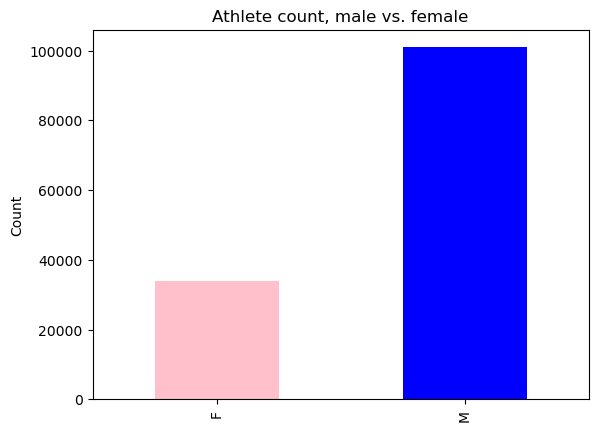

In [15]:
# Ploting visualizations

# Assign the data to a separate dataframe
data = {"Sex": [33779, 100953]}
gender_df = pd.DataFrame(data, index  = ["F", "M"])

# Plotting a bar chart
ax = gender_df["Sex"].plot(kind = "bar", color=["pink", "blue"])
plt.title("Athlete count, male vs. female")
plt.xlabel(None)
plt.ylabel("Count")

plt.show()

### 2. How many medals have been awarded to athletes?

In [16]:
# Separate the entries of athletes who won medals, using pandas' groupby
df_medals = df_athletes["Medal"].groupby(df_athletes["Medal"]).count()
df_medals

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: Medal, dtype: int64

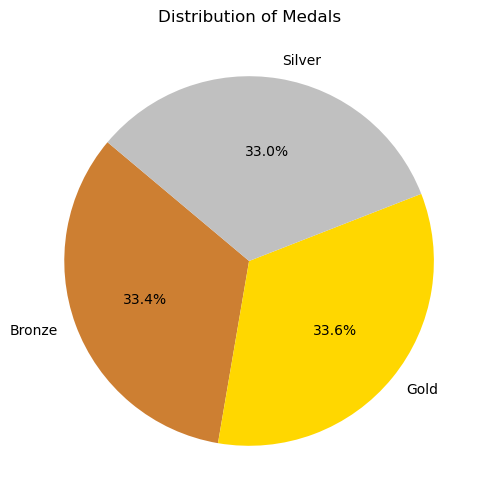

In [17]:
# Plotting medal distribution using a pie chart:

# Place the data in a dataframe:
data = {"Medal": ["Bronze", "Gold", "Silver"], "Count": [13295, 13372, 13116]}
df_medals = pd.DataFrame(data)

# Plot the figure:
plt.figure(figsize = (6, 6))
plt.pie(df_medals["Count"], labels = df_medals["Medal"], autopct = "%1.1f%%", 
        startangle = 140, colors = ["#cd7f32", "#ffd700", "#c0c0c0"])
plt.title("Distribution of Medals")
plt.show()

### How many medals has each category received?

In [18]:
# Create a new dataframe only with Name, Medal and Sex columns
df_medal_ratio = df_athletes.drop(["ID", "Age", "Height", "Weight", "Team", "NOC", 
                                 "Games", "Year", "Season", "City", "Sport", "Event"], axis = 1)
# Drop missing values
df_medal_ratio = df_medal_ratio.dropna(how = "all")
df_medal_ratio

,Name,Sex,Medal
0,A Dijiang,M,NaN
1,A Lamusi,M,NaN
2,Gunnar Nielsen Aaby,M,NaN
3,Edgar Lindenau Aabye,M,Gold
4,Christine Jacoba Aaftink,F,NaN
...,...,...,...
271111,Andrzej ya,M,NaN
271112,Piotr ya,M,NaN
271113,Piotr ya,M,NaN
271114,Tomasz Ireneusz ya,M,NaN


In [19]:
# Replace NaN values with "No Medal"
df_medal_ratio["Medal"].fillna("No Medal", inplace = True)

# Group by "Sex" and "Medal":
grouped_df = df_medal_ratio.groupby(["Sex", "Medal"]).size().unstack()

# Display the grouped DataFrame
print(grouped_df)

Medal  Bronze  Gold  No Medal  Silver
Sex                                  
F        3771  3747     63269    3735
M        9524  9625    168064    9381


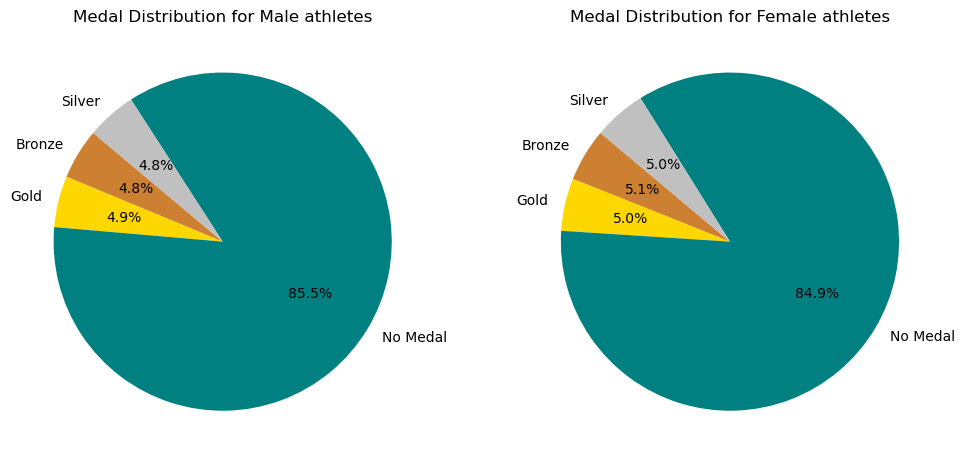

In [20]:
# Create separate DataFrames for male and female
male_df = grouped_df.loc["M"]
female_df = grouped_df.loc["F"]

# Define specific colors for each medal category
medal_colors = {
    "Gold": "#FFD700",
    "Silver": "#C0C0C0",
    "Bronze": "#CD7F32",
    "No Medal": "#008080"
}

# Plotting separate pie charts for male and female athletes
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# Male athlete Pie Chart
axes[0].pie(male_df, labels = male_df.index, autopct = "%1.1f%%", 
            startangle = 140, colors = [medal_colors.get(medal, "#D3D3D3") for medal in male_df.index])
axes[0].set_title("Medal Distribution for Male athletes")

# Female athlete Pie Chart
axes[1].pie(female_df, labels = female_df.index, autopct = "%1.1f%%", startangle = 140, 
            colors = [medal_colors.get(medal, "#D3D3D3") for medal in female_df.index])
axes[1].set_title("Medal Distribution for Female athletes")

plt.show()

### How many athletes have participated in winter events compared to summer events?

In [21]:
# Separate the entries, based on the season
df_seasons = df_athletes["Season"].groupby(df_athletes["Season"]).count()
df_seasons

Season
Summer    222552
Winter     48564
Name: Season, dtype: int64

In [22]:
# Calculate the summer vs. winter ratio
df_seasons_ratio = df_seasons / df_seasons.sum()
df_seasons_ratio

Season
Summer    0.820874
Winter    0.179126
Name: Season, dtype: float64

Given these numbers, we can see that 82% of the registered athletes have participated in summer events and approximately 18% in winter events.

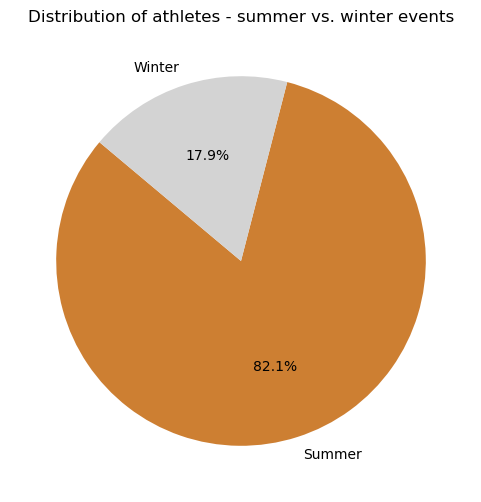

In [23]:
# Place the data in a dataframe:
data = {"Athlete": ["Summer", "Winter"], "Count": [222552, 48564]}
df_pie = pd.DataFrame(data)

# Plot the figure:
plt.figure(figsize = (6, 6))
plt.pie(df_pie["Count"], labels = df_pie["Athlete"], autopct = "%1.1f%%", 
        startangle = 140, colors = ["#cd7f32", "#D3D3D3"])
plt.title("Distribution of athletes - summer vs. winter events")
plt.show()

### How many sports are there, comparing winter and summer events?

In [24]:
# Group the dataframe based on seasons and sports:
grouped_df = df_athletes.groupby(["Season", "Sport"])

# Count the number of occurences for each sport/season:
count_per_group = grouped_df.size().reset_index(name = "Count")

In [25]:
# Create 2 new dataframes for each sport:
summer_df = count_per_group[count_per_group["Season"] == "Summer"]
winter_df = count_per_group[count_per_group["Season"] == "Winter"]

# Count the unique sports in each season
num_sports_summer = summer_df["Sport"].nunique()
num_sports_winter = winter_df["Sport"].nunique()

# Display the results
print(f"Number of sports in Summer: {num_sports_summer}")
print(f"Number of sports in Winter: {num_sports_winter}")

Number of sports in Summer: 52
Number of sports in Winter: 17


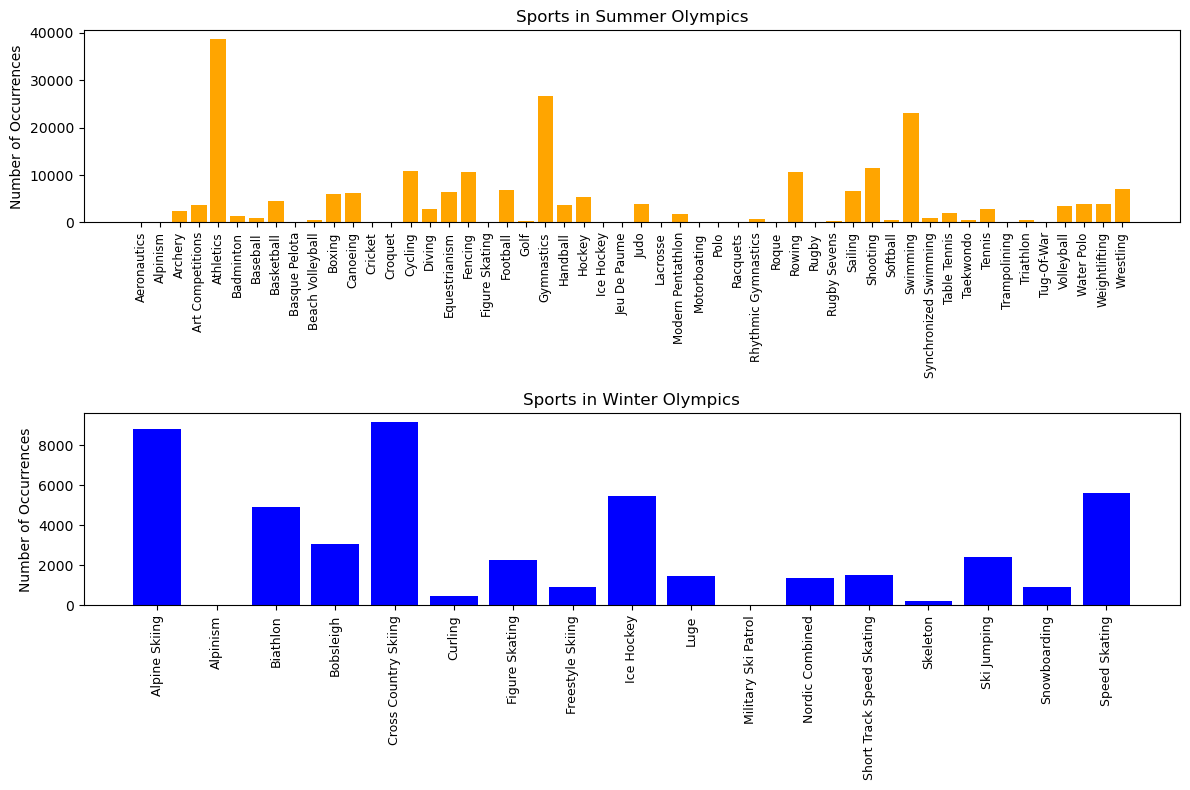

In [26]:
# Create separate subplots for Summer and Winter
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 8))

# Bar chart for Summer Olympics
ax1.bar(summer_df["Sport"], summer_df["Count"], color = "orange", label = "Sports")
ax1.set_xlabel(None)
ax1.set_ylabel("Number of Occurrences")
ax1.set_title("Sports in Summer Olympics")
ax1.tick_params(axis = "x", rotation = 90, labelsize = 8.5)

# Bar chart for Winter Olympics
ax2.bar(winter_df["Sport"], winter_df["Count"], color = "blue", label = "Sports")
ax2.set_xlabel(None)
ax2.set_ylabel("Number of Occurrences")
ax2.set_title("Sports in Winter Olympics")
ax2.tick_params(axis = "x", rotation = 90, labelsize = 9)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

### How many teams have registered for winter/summer events?

In [27]:
# Group the dataframe based on season:
grouped_df = df_athletes.groupby("Season")

# Counting unique teams in each season
unique_teams_by_season = grouped_df["Team"].nunique()

# Display the result
print("Number of unique teams grouped by season:")
print(unique_teams_by_season)

Number of unique teams grouped by season:
Season
Summer    1157
Winter     221
Name: Team, dtype: int64


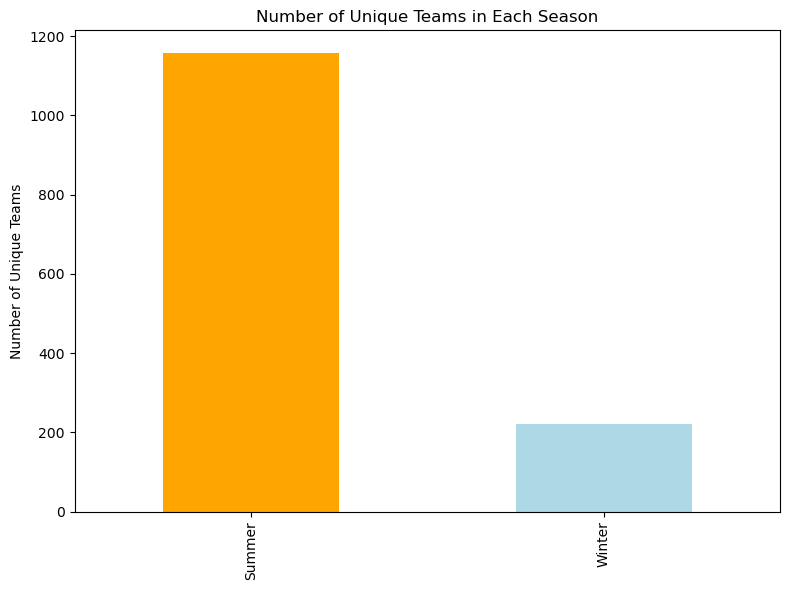

In [28]:
# Create a bar chart for the count of unique teams in each season
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart
unique_teams_by_season.plot(kind = "bar", color = ["orange", "lightblue"], ax = ax)

# Customize the chart
ax.set_xlabel(None)
ax.set_ylabel("Number of Unique Teams")
ax.set_title("Number of Unique Teams in Each Season")

# Show the plot
plt.tight_layout()
plt.show()

**In the next part of the analysis, SQL querying will be used to extract relevant information in order to determine how athletes are spread between summer and winter events, while also comparing the male vs. female athletes ratio.**

In [29]:
# Create separate dataframes for summer and winter events
summer_df = df_athletes[df_athletes["Season"] == "Summer"]
winter_df = df_athletes[df_athletes["Season"] == "Winter"]

In [30]:
# SQL query for athletes participating in summer events:
print(
      pysqldf('''SELECT Sex AS sex
                        , COUNT(*) AS athlete_count
                        , ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) over (), 2) AS ratio
                 FROM summer_df
                 GROUP BY Sex''')
    )

  sex  athlete_count  ratio
0   F          59443  26.71
1   M         163109  73.29


In [31]:
# SQL query for athletes participating in winter events:
print(
      pysqldf('''SELECT Sex AS sex
                        , COUNT(*) AS athlete_count
                        , ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) over (), 2) AS ratio
                 FROM winter_df
                 GROUP BY Sex''')
    )

  sex  athlete_count  ratio
0   F          15079  31.05
1   M          33485  68.95


**The results above show the following:**
1. During **summer events**, athlete participants comprise roughly **73.3% males** and **26.7% females**
2. During **winter events**, athlete participants comprise roughly **69% males** and **31% females**
Therefore, there is a slight increase in female participants during winter events, compared to summer ones.
<br> 
Even so, male athletes have the large majority of participation in both seasonal events.

Next, I want to examine the averages regarding athlete age, weight and height, comparing male vs. female participants.

In [32]:
# SQL query for athletes participating in summer events:
print(
      pysqldf('''SELECT Sex AS sex
                        , ROUND(AVG(Age), 2) AS age_average
                        , ROUND(AVG(Height), 2) AS height_average
                        , ROUND(AVG(Weight), 2) AS weight_average
                 FROM summer_df
                 GROUP BY Sex
                 ''')
    )

  sex  age_average  height_average  weight_average
0   F        23.66          168.17           60.09
1   M        26.44          178.90           75.60


In [33]:
# SQL query for athletes participating in winter events:
print(
      pysqldf('''SELECT Sex AS sex
                        , ROUND(AVG(Age), 2) AS age_average
                        , ROUND(AVG(Height), 2) AS height_average
                        , ROUND(AVG(Weight), 2) AS weight_average
                 FROM winter_df
                 GROUP BY Sex
                 ''')
    )

  sex  age_average  height_average  weight_average
0   F        24.01          166.53           59.76
1   M        25.50          178.67           76.36


#### Given these results, it is clear that male athletes have a slightly higher average age when compared to the female athletes.

#### It is important to keep in mind that in the initial Exploratory Data Analysis (EDA), a lot of missing values have been observed in the Age, Weight and Height columns from the "athlete_events.csv" dataset, as follows:
 - Age         9474
 - Height     60171
 - Weight     62875
#### Considering these missing values, the previous results might not represent the real situation as accurately as needed for the analysis.

Next, I will examine how athlete count has increased / decreased over the analyzed period, while comparing male vs. female participants.

In [34]:
# SQL query for male athletes participating in summer events:
summer_athletes_total = (pysqldf('''
                                   SELECT Year AS year
                                          , COUNT(*) AS total_athletes
                                   FROM summer_df
                                   GROUP BY Year
                                ''')
                        )
# SQL query for male athletes participating in winter events:
winter_athletes_total = (pysqldf('''
                                   SELECT Year AS year
                                          , COUNT(*) AS total_athletes
                                   FROM winter_df
                                   GROUP BY Year
                                ''')    
                        )  

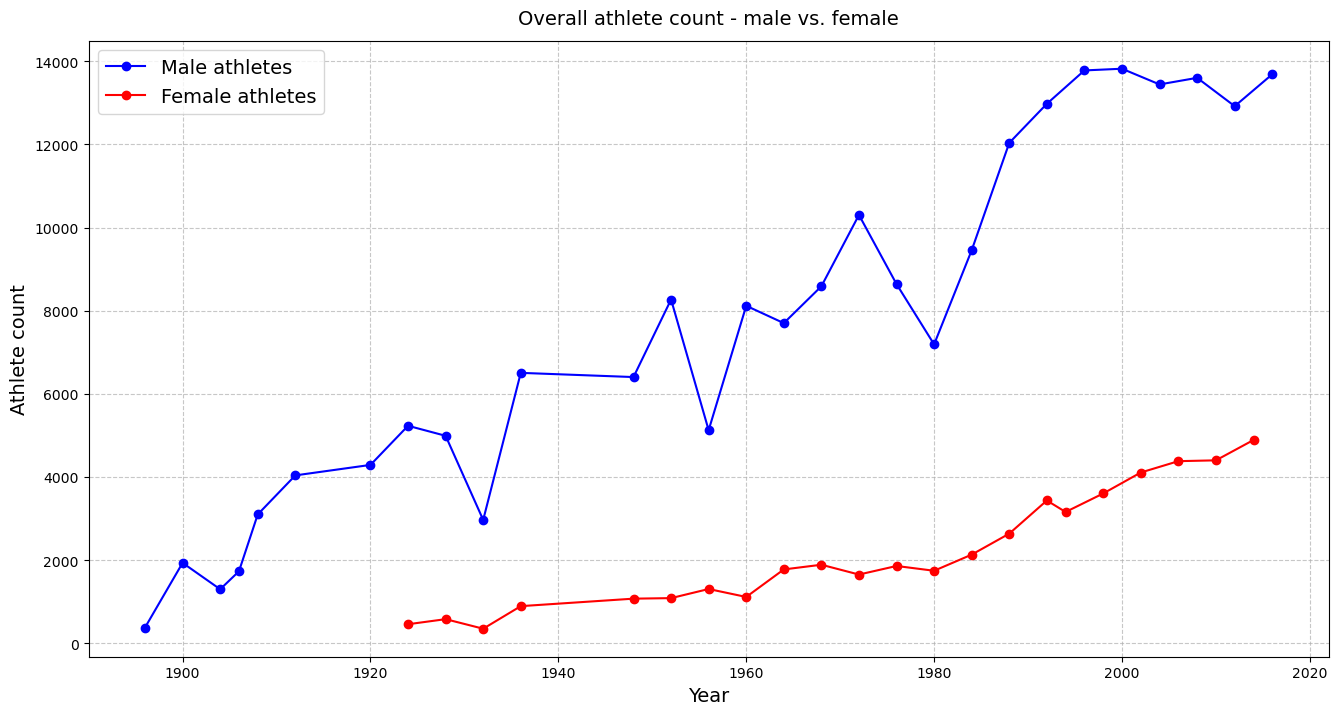

In [35]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_athletes_total.year, summer_athletes_total.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(winter_athletes_total.year, winter_athletes_total.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [36]:
# SQL query for male athletes participating in summer events:
summer_athletes_male = (pysqldf('''
                                   SELECT Year AS year
                                          , COUNT(*) AS total_athletes
                                   FROM summer_df
                                   WHERE Sex = "M"
                                   GROUP BY Year
                                ''')
                       )
# SQL query for female athletes participating in summer events:
summer_athletes_female = (pysqldf('''
                                     SELECT Year AS year
                                            , COUNT(*) AS total_athletes
                                     FROM summer_df
                                     WHERE Sex = "F"
                                     GROUP BY Year
                                  ''')
                         )

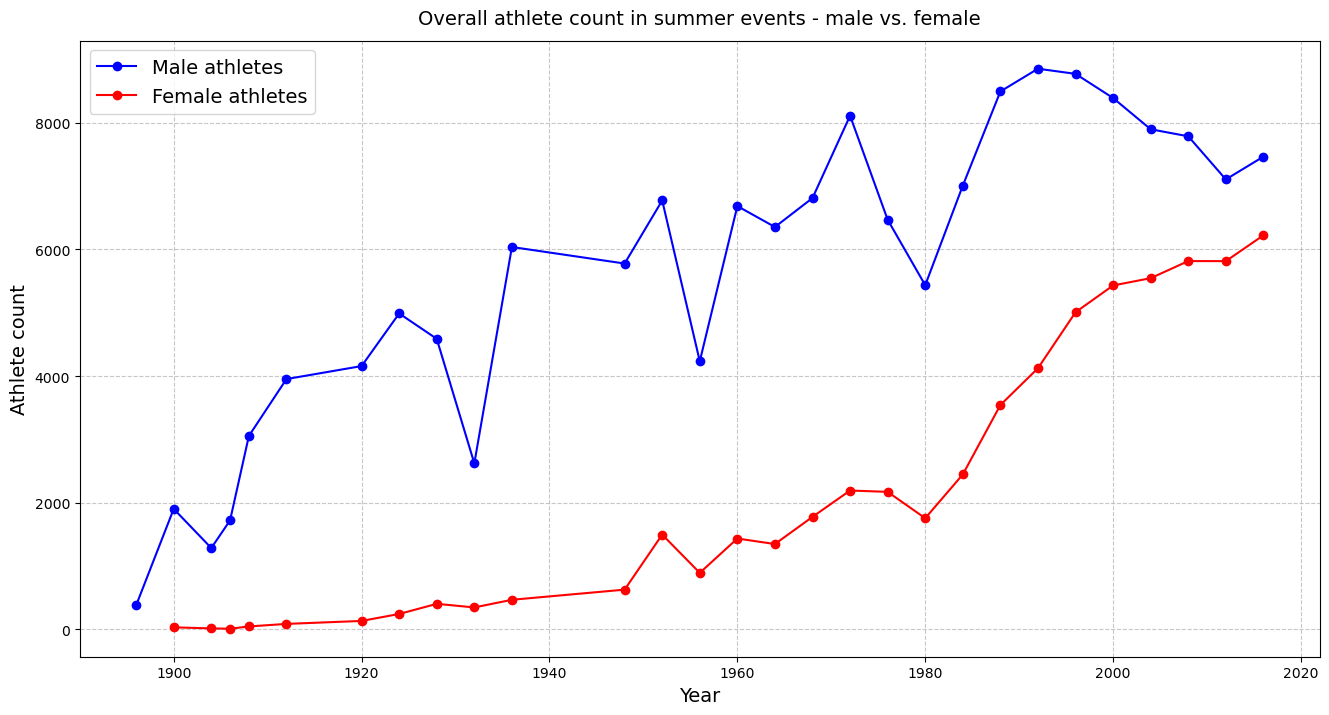

In [37]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_athletes_male.year, summer_athletes_male.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(summer_athletes_female.year, summer_athletes_female.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count in summer events - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [38]:
# SQL query for male athletes participating in winter events:
winter_athletes_male = (pysqldf('''
                                   SELECT Year AS year
                                           , COUNT(*) AS total_athletes
                                   FROM winter_df
                                   WHERE Sex = "M"
                                   GROUP BY Year
                                ''')
                       )
# SQL query for female athletes participating in winter events:
winter_athletes_female = (pysqldf('''
                                     SELECT Year AS year
                                             , COUNT(*) AS total_athletes
                                     FROM winter_df
                                     WHERE Sex = "F"
                                     GROUP BY Year
                                  ''')
                         )

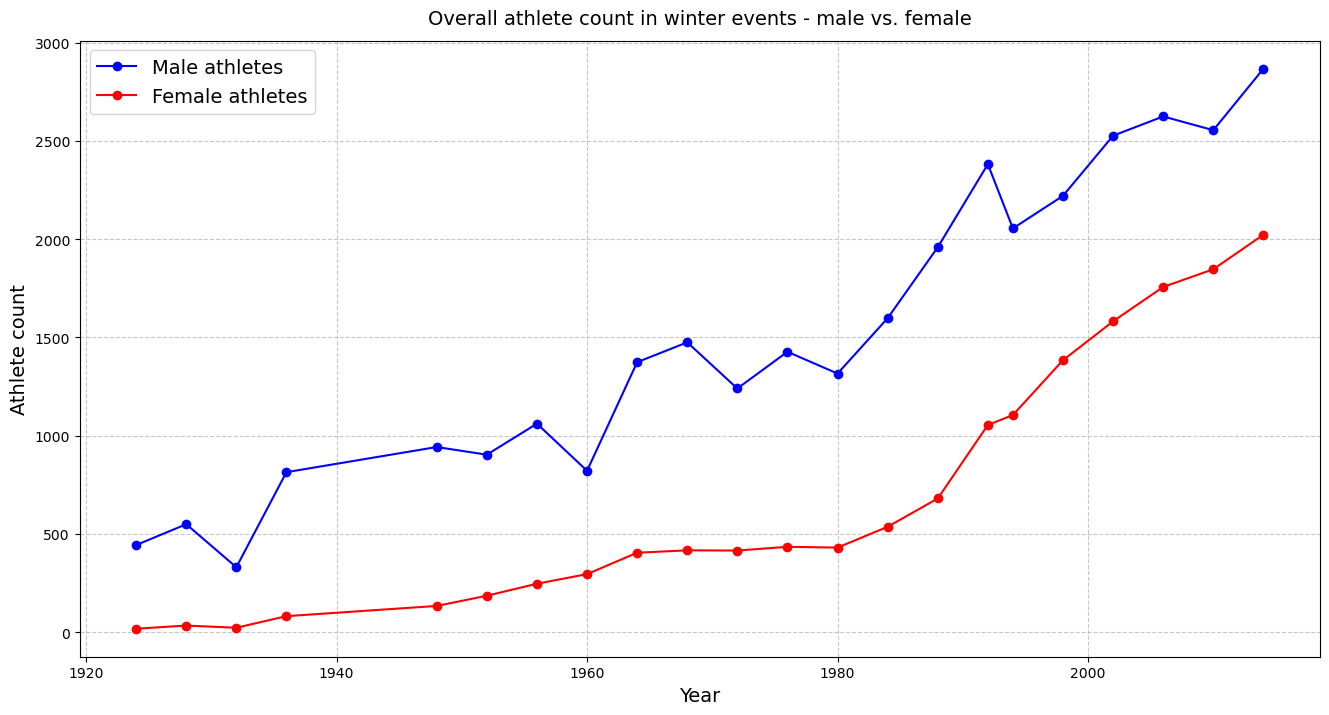

In [39]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(winter_athletes_male.year, winter_athletes_male.total_athletes, color = "blue", 
         marker = "o", label = "Male athletes")
plt.plot(winter_athletes_female.year, winter_athletes_female.total_athletes, color = "red", 
         marker = "o", label = "Female athletes")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Athlete count", fontsize = 14)
plt.title("Overall athlete count in winter events - male vs. female", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

**Considering the three graphs above, it is evident that the athlete count has consistently demonstrated a noticeable upward trend over the years. This indicates a continuous growth in participation in sporting events for both male and female participants.**

In the next part, I will examine how the medal count has increased or decreased over the analyzed period, comparing male vs. female athletes.

In [40]:
# SQL query for medals won in summer events:
summer_medals = (pysqldf('''
                           SELECT Year AS year
                                  , COUNT(Medal) AS total_medals
                           FROM summer_df
                           GROUP BY Year
                        ''')
                 )
# SQL query for medals won in winter events:
winter_medals = (pysqldf('''
                           SELECT Year AS year
                                 , COUNT(Medal) AS total_medals
                           FROM winter_df
                           GROUP BY Year
                        ''')
                 )

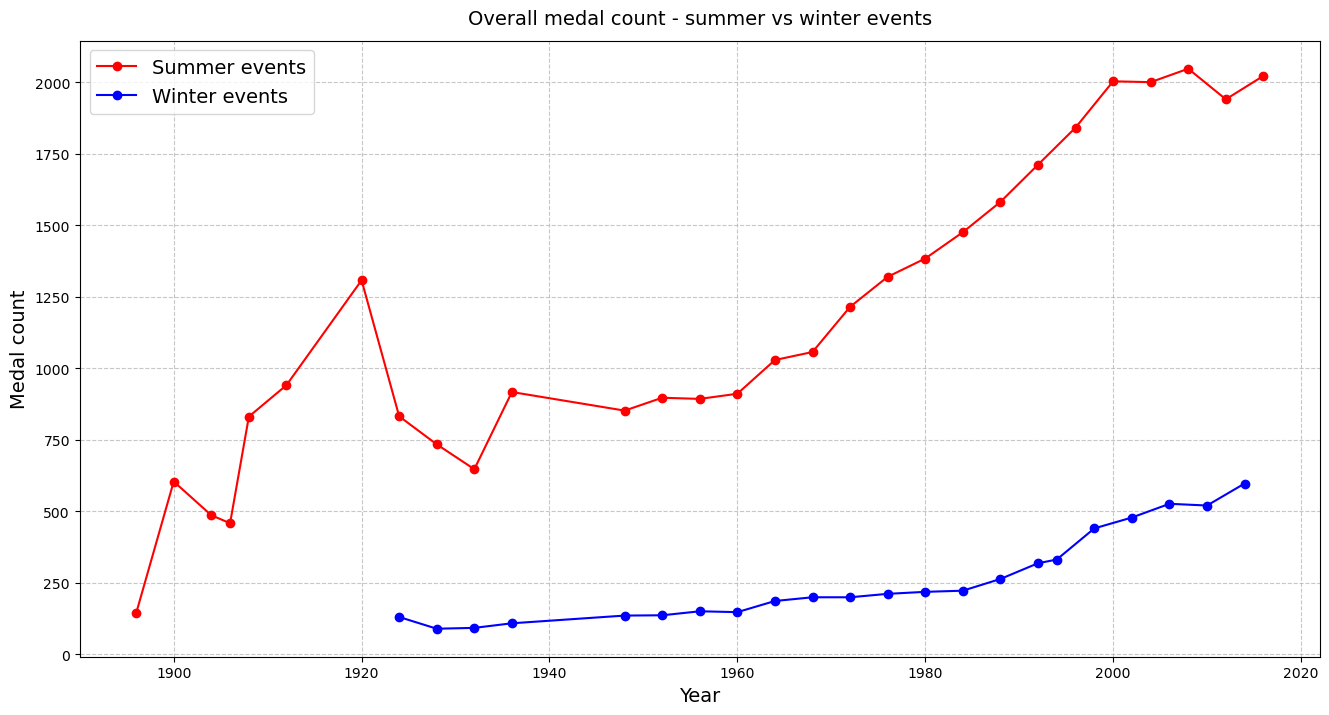

In [41]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_medals.year, summer_medals.total_medals, color = "red", 
         marker = "o", label = "Summer events")
plt.plot(winter_medals.year, winter_medals.total_medals, color = "blue", 
         marker = "o", label = "Winter events")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Medal count", fontsize = 14)
plt.title("Overall medal count - summer vs winter events", fontsize = 14, pad = 12)
plt.legend(fontsize = 14, loc = "upper left")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

In [42]:
# SQL query for medal ratio for summer events:
summer_medals = pysqldf('''
                    SELECT Year AS year
                            , ROUND(CAST(medal_count AS FLOAT) / total_count, 2) AS medal_ratio
                            , ROUND(CAST(gold_count AS FLOAT) / medal_count, 2) AS gold_ratio
                            , ROUND(CAST(silver_count AS FLOAT) / medal_count, 2) AS silver_ratio
                            , ROUND(CAST(bronze_count AS FLOAT) / medal_count, 2) AS bronze_ratio
                    FROM (
                          SELECT Year
                                  , COUNT(*) AS total_count
                                  , SUM(CASE
                                           WHEN Medal IS NOT NULL 
                                           THEN 1 
                                           ELSE 0
                                        END) AS medal_count
                                  , SUM(CASE
                                           WHEN Medal = "Gold" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS gold_count
                                 , SUM(CASE
                                           WHEN Medal = "Silver" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS silver_count
                                 , SUM(CASE
                                           WHEN Medal = "Bronze" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS bronze_count
                          FROM summer_df
                          GROUP BY Year 
                        ) x
                       ''')

print(summer_medals)

    year  medal_ratio  gold_ratio  silver_ratio  bronze_ratio
0   1896         0.38        0.43          0.30          0.27
1   1900         0.31        0.33          0.38          0.29
2   1904         0.37        0.36          0.34          0.31
3   1906         0.26        0.34          0.34          0.32
4   1908         0.27        0.35          0.34          0.31
5   1912         0.23        0.35          0.33          0.32
6   1920         0.30        0.38          0.34          0.28
7   1924         0.16        0.33          0.34          0.33
8   1928         0.15        0.33          0.33          0.34
9   1932         0.22        0.35          0.33          0.32
10  1936         0.14        0.34          0.34          0.32
11  1948         0.13        0.34          0.33          0.33
12  1952         0.11        0.34          0.32          0.33
13  1956         0.17        0.34          0.33          0.33
14  1960         0.11        0.34          0.32          0.34
15  1964

In [43]:
# SQL query for medal ratio for winter events:
winter_medals = pysqldf('''
                    SELECT Year AS year
                            , ROUND(CAST(medal_count AS FLOAT) / total_count, 2) AS medal_ratio
                            , ROUND(CAST(gold_count AS FLOAT) / medal_count, 2) AS gold_ratio
                            , ROUND(CAST(silver_count AS FLOAT) / medal_count, 2) AS silver_ratio
                            , ROUND(CAST(bronze_count AS FLOAT) / medal_count, 2) AS bronze_ratio
                    FROM (
                          SELECT Year
                                  , COUNT(*) AS total_count
                                  , SUM(CASE
                                           WHEN Medal IS NOT NULL 
                                           THEN 1 
                                           ELSE 0
                                        END) AS medal_count
                                  , SUM(CASE
                                           WHEN Medal = "Gold" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS gold_count
                                 , SUM(CASE
                                           WHEN Medal = "Silver" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS silver_count
                                 , SUM(CASE
                                           WHEN Medal = "Bronze" 
                                           THEN 1 
                                           ELSE 0
                                        END) AS bronze_count
                          FROM winter_df
                          GROUP BY Year 
                        ) x
                       ''')
print(winter_medals)

    year  medal_ratio  gold_ratio  silver_ratio  bronze_ratio
0   1924         0.28        0.42          0.29          0.28
1   1928         0.15        0.34          0.31          0.35
2   1932         0.26        0.35          0.35          0.30
3   1936         0.12        0.33          0.34          0.32
4   1948         0.13        0.30          0.36          0.34
5   1952         0.13        0.33          0.32          0.35
6   1956         0.11        0.34          0.33          0.33
7   1960         0.13        0.34          0.33          0.33
8   1964         0.10        0.33          0.36          0.31
9   1968         0.11        0.33          0.35          0.32
10  1972         0.12        0.35          0.32          0.33
11  1976         0.11        0.33          0.34          0.33
12  1980         0.12        0.33          0.33          0.33
13  1984         0.10        0.33          0.33          0.33
14  1988         0.10        0.33          0.33          0.33
15  1992

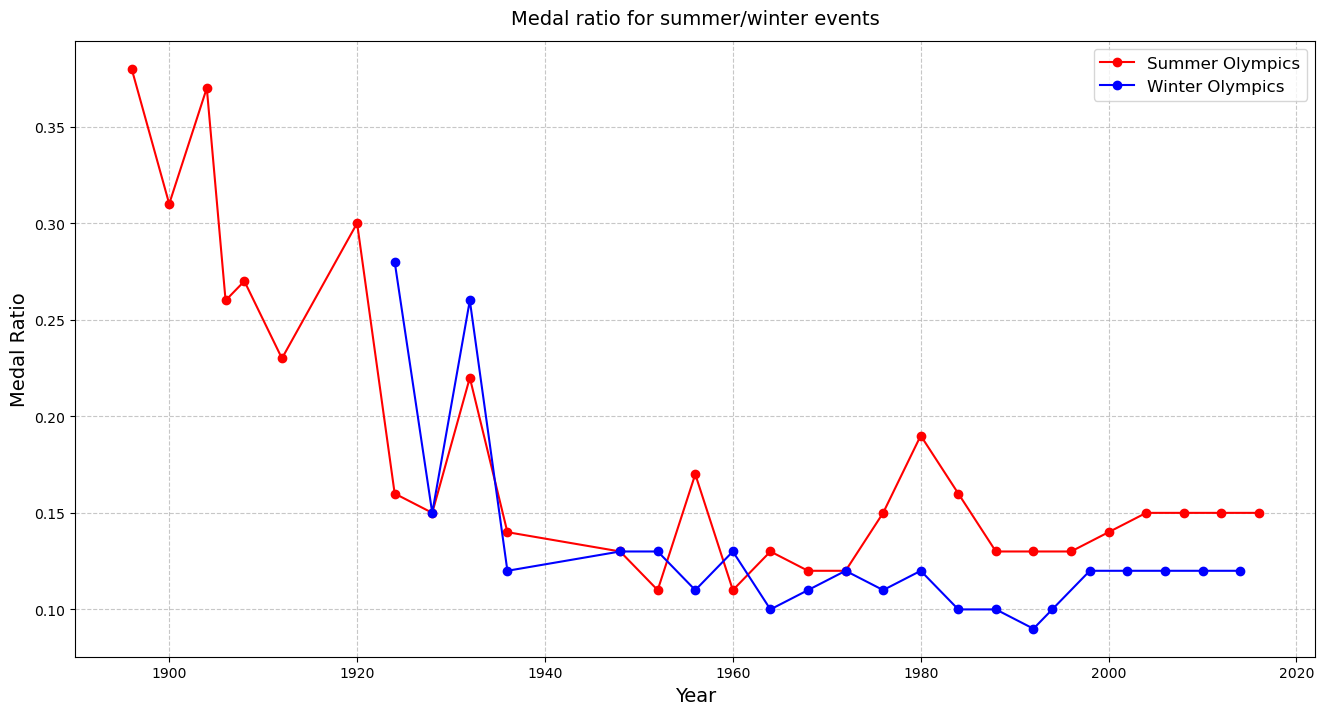

In [44]:
# Visualize the results using a line chart:
plt.figure(figsize = (16,8))

plt.plot(summer_medals.year, summer_medals.medal_ratio, color = "red", marker = "o", label = "Summer Olympics")
plt.plot(winter_medals.year, winter_medals.medal_ratio, color = "blue", marker = "o", label = "Winter Olympics")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Medal Ratio", fontsize = 14)
plt.legend(fontsize = 12)
plt.title("Medal ratio for summer/winter events", fontsize = 14, pad = 12)
# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

plt.show()

### Given the charts above, it is evident that in the earlier stages of these sports competitions, up to the middle of the 20th century, there was a high fluctuation in medal ratios between events. However, after the 1990s, the ratio stabilizes. This stabilization may be attributed to changes such as:

1. **Maturation of sports:** 
 - As a sport matures, participants, coaches, and governing bodies may develop better strategies, techniques, and training methods. Consequently, the level of competition may stabilize as participants reach a plateau in terms of performance.
<br>
2. **Rule changes:** 
 - Changes in the rules of a sport can significantly impact performance. Once new rules are established and widely adopted, the impact on performance may stabilize, leading to a leveling off of trends.
<br>
3. **Records and limits:** 
 - In some cases, there may be physical or physiological limits to human performance in a given sport. As these limits are approached, it becomes increasingly challenging for athletes to make significant improvements.

**Next, I will examine how an athlete's age influences their ability to receive medals.**

In [45]:
# SQL query for total medals in summer events:
medal_count_by_age_summer = (pysqldf('''
                                   SELECT Age AS age
                                            , Medal AS medals
                                            , COUNT(Medal) AS total_medals
                                   FROM summer_df
                                   GROUP BY Age, Medal
                                ''')
                       )
# SQL query for total medals in winter events:
medal_count_by_age_winter = (pysqldf('''
                                   SELECT Age AS age
                                            , Medal AS medals
                                            , COUNT(Medal) AS total_medals
                                   FROM winter_df
                                   GROUP BY Age, Medal
                                ''')
                       )

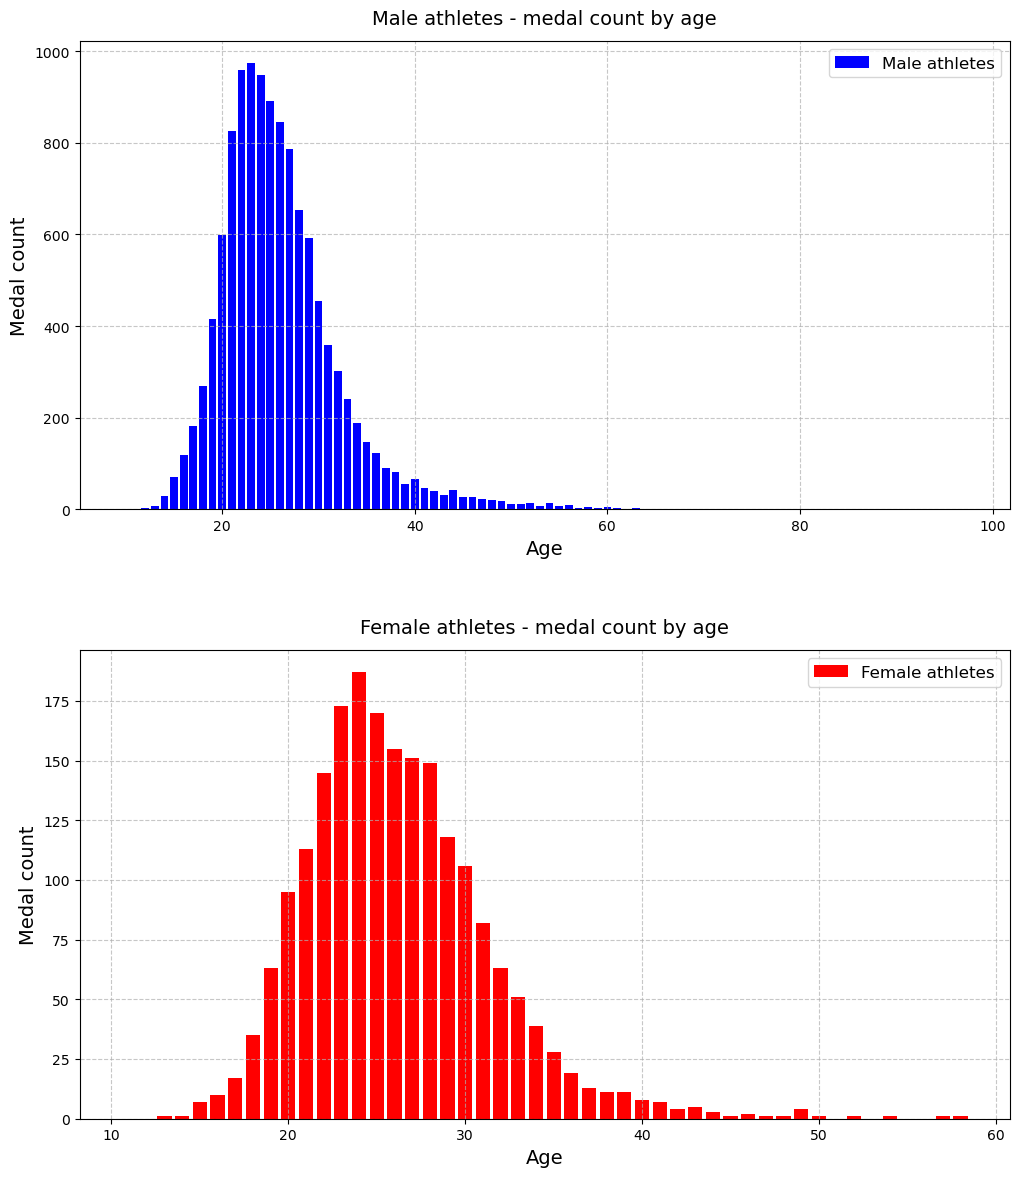

In [46]:
# Visualize the results using a line chart:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,14))

# Chart for male athletes:
ax[0].bar(medal_count_by_age_summer.age, medal_count_by_age_summer.total_medals, 
        color = "blue", label = "Male athletes")
ax[0].grid(True, linestyle = "--", alpha = 0.7)
ax[0].set_xlabel("Age", fontsize = 14)
ax[0].set_ylabel("Medal count", fontsize = 14)
ax[0].set_title("Male athletes - medal count by age", fontsize = 14, pad = 12)
ax[0].legend(fontsize = 12, loc = "upper right")

# Chart for female athletes:
plt.bar(medal_count_by_age_winter.age, medal_count_by_age_winter.total_medals, 
         color = "red", label = "Female athletes")
ax[1].grid(True, linestyle = "--", alpha = 0.7)
ax[1].set_xlabel("Age", fontsize = 14)
ax[1].set_ylabel("Medal count", fontsize = 14)
ax[1].set_title("Female athletes - medal count by age", fontsize = 14, pad = 12)
ax[1].legend(fontsize = 12, loc = "upper right")

# Add grid:
plt.grid(True, linestyle = "--", alpha = 0.7)

# Adjust the height space between the subplots
plt.subplots_adjust(hspace = 0.3)

plt.show()

The two graphs above illustrate that athletes aged between 20 and 30 have the highest count of medals received, a trend observed in both male and female participants. 
<br>
**In this case, we can infer that younger athletes have a greater likelihood of winning more medals than their counterparts.**
**Once again, it's important to note that in the initial Exploratory Data Analysis (EDA), there were 9,474 missing values in the Age column of the 'athlete_events.csv' dataset.**
<br>
**Considering these missing values, the presented age distribution might not accurately represent the real situation as needed for the analysis.**

### Analysis summary:
Given my analysis so far, I've found that the **athlete count has exhibited a consistent and noticeable upward trend over the years**, indicating a continuous growth in participation in the sporting events.
<br>
There has also been a **noticeable upward trend over the years in terms of total medals won by the athletes**, which is **true** **for both male and female participants**.
<br>
Considering my initial hypotheses, I can conclude that all three of them have been confirmed by the analysis, as follows:
<br>

**Hypothesis no. 1 conclusion: More male athletes than female.**
<br>
My analysis revealed that in summer events, approximately 73.3% of participants were males, and 26.7% were females. For winter events, roughly 69% were males, and 31% were females.
<br>

**Hypothesis no. 2 conclusion: Overall improvement in athlete performance**
<br>
My analysis revealed the following:
- Summer events showed a noticeable increase in medals won starting from the 1960s.
- Winter events exhibited a noticeable increase in medals won starting from the 1990s.
<br>

**The majority of athletes prefer to participate in summer events.**
<br>

**Hypothesis no. 3 conclusion: Younger athletes win more medals**
<br>
My analysis revealed that athletes aged between 20 and 30 garnered the highest count of medals, true for both male and female participants.

### Considering these insights, I will be looking to answer two additional questions:
1. Does the performance of a team vary significantly during summer/winter events?
2. Is there a correlation between a team's performance during summer and winter events?

In [47]:
# SQL query for total medals in summer events:
summer_medal_total = pysqldf('''
                             SELECT Year AS year
                                     , COUNT(*) AS total_count
                                     , SUM(CASE
                                               WHEN Medal IS NOT NULL 
                                               THEN 1 
                                               ELSE 0
                                           END) AS medal_count
                                     , SUM(CASE
                                               WHEN Medal = "Gold" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS gold_count
                                     , SUM(CASE
                                               WHEN Medal = "Silver" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS silver_count
                                     , SUM(CASE
                                               WHEN Medal = "Bronze" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS bronze_count
                                 FROM summer_df
                                 GROUP BY Year 
                               ''')
print(summer_medal_total.head(10))

   year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1896          380          143          62            43            38
1  1900         1936          604         201           228           175
2  1904         1301          486         173           163           150
3  1906         1733          458         157           156           145
4  1908         3101          831         294           281           256
5  1912         4040          941         326           315           300
6  1920         4292         1308         493           448           367
7  1924         5233          832         277           281           274
8  1928         4992          734         245           239           250
9  1932         2969          647         229           214           204


In [48]:
# SQL query for total medals in winter events:
winter_medal_total = pysqldf('''
                             SELECT Year AS year
                                     , COUNT(*) AS total_count
                                     , SUM(CASE
                                               WHEN Medal IS NOT NULL 
                                               THEN 1 
                                               ELSE 0
                                           END) AS medal_count
                                     , SUM(CASE
                                               WHEN Medal = "Gold" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS gold_count
                                     , SUM(CASE
                                               WHEN Medal = "Silver" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS silver_count
                                     , SUM(CASE
                                               WHEN Medal = "Bronze" 
                                               THEN 1 
                                               ELSE 0
                                           END) AS bronze_count
                                 FROM winter_df
                                 GROUP BY Year 
                               ''')
print(winter_medal_total.head(10))

   year  total_count  medal_count  gold_count  silver_count  bronze_count
0  1924          460          130          55            38            37
1  1928          582           89          30            28            31
2  1932          352           92          32            32            28
3  1936          895          108          36            37            35
4  1948         1075          135          41            48            46
5  1952         1088          136          45            44            47
6  1956         1307          150          51            49            50
7  1960         1116          147          50            48            49
8  1964         1778          186          61            67            58
9  1968         1891          199          66            70            63


**The two tables created will be utilized to calculate the Pearson correlation coefficient between the total number of medals in the Winter and Summer Olympics.**

After reviewing the data from the query results, it is apparent that winter events began in 1924, whereas summer events commenced in 1896. Consequently, some records will need to be trimmed from the summer events table to align it with the same starting point as the winter events table.

In [49]:
# Assign the new table to a variable, using slicing:
summer_medal_total_new = summer_medal_total[7:]

**Now, we can compute the Pearson correlation coefficient between the total number of medals in winter and summer sports events from 1924 to 2016**

In [50]:
# Assign the medal counts for each season into variables
x_simple = winter_medal_total.medal_count
y_simple = summer_medal_total_new.medal_count

# Extract the Pearson coefficient
result = np.corrcoef(x_simple, y_simple)
print(result)

[[1.         0.94141801]
 [0.94141801 1.        ]]


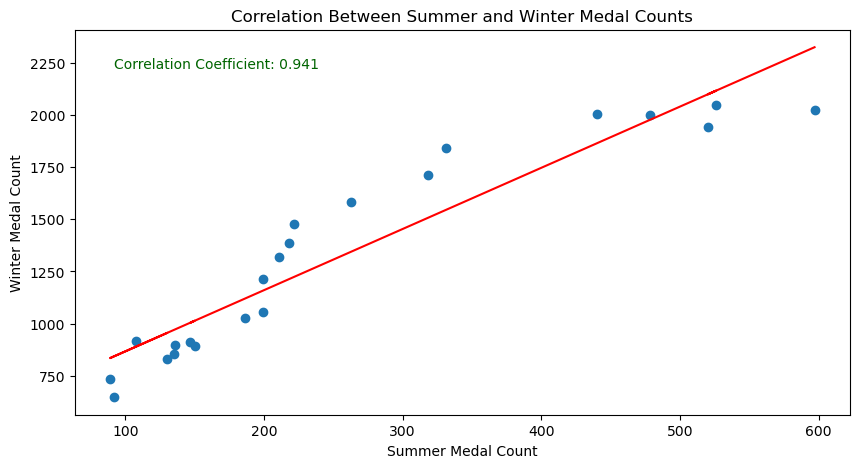

In [51]:
# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x_simple, y_simple)

plt.figure(figsize = (10,5))

# Create a scatter plot
plt.scatter(x_simple, y_simple, label = "Data Points")

# Plot the regression line
regression_line = slope * x_simple + intercept
plt.plot(x_simple, regression_line, color = "red", label = "Linear Regression")

# Set labels and title
plt.xlabel("Summer Medal Count")
plt.ylabel("Winter Medal Count")
plt.title("Correlation Between Summer and Winter Medal Counts")

# Display the correlation coefficient on the plot
plt.text(0.05, 0.90, f"Correlation Coefficient: {result[0, 1]:.3f}", transform = plt.gca().transAxes, color = "darkgreen")

# Display the plot
plt.show()

The **Pearson correlation coefficient** between the total number of medals in the Winter and Summer Olympics from 1924 to 2016 **is 0.94**, indicating a **highly positive correlation**. **Therefore, we can conclude that a country's performance in the Winter Olympics is strongly correlated with its performance in the Summer Olympics**.
***
**Another relevant metric** to examine would be the **standard deviation in country performance over the years**. This statistical measure can indicate the extent to which countries' performances deviate from the average during Summer and Winter Olympics.

In [52]:
# Assign the values to variables
std_medal_count_summer_olympics = np.std(y_simple)
std_medal_count_winter_olympics = np.std(x_simple)

# Display the results
print("std_medal_count_summer_olympics =",std_medal_count_summer_olympics)
print("std_medal_count_winter_olympics =",std_medal_count_winter_olympics)

std_medal_count_summer_olympics = 475.323015441357
std_medal_count_winter_olympics = 152.56899942903493


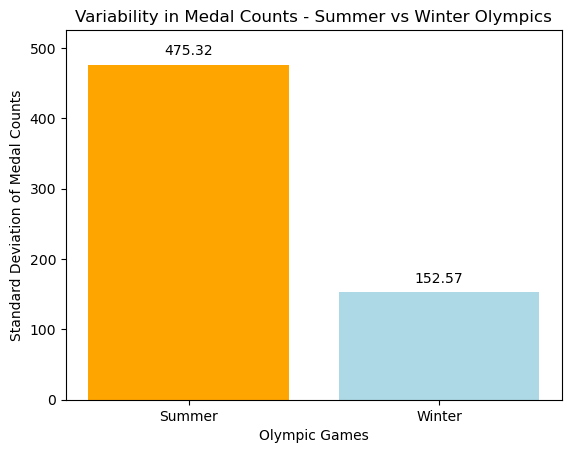

In [53]:
# Categories for the bar chart
categories = ["Summer", "Winter"]

# Standard deviations for each category
std_devs = [std_medal_count_summer_olympics, std_medal_count_winter_olympics]

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, std_devs, color = ["orange", "lightblue"])

# Adding labels and title
plt.xlabel("Olympic Games")
plt.ylabel("Standard Deviation of Medal Counts")
plt.title("Variability in Medal Counts - Summer vs Winter Olympics")

# Display the values on top of the bars
for bar, value in zip(bars, std_devs):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f"{value:.2f}", ha = "center", va = "bottom")

# Set y-axis limit to accommodate labels
ax.set_ylim(0, max(std_devs) + 50)    
    
# Show the plot
plt.show()

Given these results from 1924 to 2016, we observe that the standard deviation in the Summer Olympics is approximately three times higher than in the Winter Olympics. A higher standard deviation in the number of medals obtained in the Summer Olympics suggests a more diverse and varied competitive landscape, with a broader range of performance outcomes among participating countries.
#### This difference in standard deviation could be explained by factors such as:
**Variability in Performance:**
<br>
- A higher standard deviation for Summer Olympic medal counts suggests greater variability in the performance of countries across different Summer Olympics. Some countries may consistently excel, while others may have more variable performances from one Olympics to another.
<br>
- Conversely, a lower standard deviation for Winter Olympic medal counts indicates that performances in Winter Olympics are relatively more consistent or stable across different years.

**Consistency of Success:**
<br>
- The higher standard deviation in Summer Olympic medal counts could be attributed to factors such as larger participation, more diverse events, or varying dominance by different countries in different years.
<br>
- On the other hand, a lower standard deviation in Winter Olympic medal counts may suggest that certain countries consistently perform well or that the distribution of medals is more concentrated among a few nations in Winter Olympic sports.

**In conclusion, this study has delved into various aspects of Olympic data spanning from 1896 to 2016, with a focus on both Summer and Winter Olympic events.** **<u>Several key findings have emerged</u>:**

**1.** **Athlete Participation:**
<br>
Over the years, there has been a consistent and noticeable upward trend in athlete count, indicating sustained growth in participation in both Summer and Winter Olympic events.

**2.** **Medals Performance**:
<br>
The analysis revealed an increase in the total number of medals won by athletes in both Summer and Winter events, with noticeable upward trends starting from specific decades.

**3.** **Gender Distribution**:
<br>
Hypothesis no. 1 was confirmed, indicating that there are more male athletes than females, with variations in gender distribution observed in both Summer and Winter events.

**4.** **Performance Trends**:
<br>
Hypothesis no. 2 was confirmed, showcasing an overall improvement in athlete performance in terms of medals won over the analyzed period, with specific periods of noticeable growth.

**5.** **Age and Medal Count**:
<br>
Hypothesis no. 3 was confirmed, illustrating that athletes aged between 20 and 30 tend to receive the highest count of medals, holding true for both male and female participants.

**6.** **Correlation between Summer and Winter Performance**:
<br>
The Pearson correlation coefficient analysis demonstrated a highly positive correlation (0.94) between the total number of medals in Winter and Summer Olympics, indicating that a country's performance in one season is strongly linked to its performance in the other.

**7.** **Standard Deviation in Performance**:
<br>
The study observed that the standard deviation in Summer Olympic medal counts is about three times higher than in Winter Olympics, suggesting a more diverse and varied competitive landscape in Summer events.
Implications:

The findings emphasize the need for nuanced analyses considering factors such as gender, age, and historical trends when evaluating Olympic data. Additionally, the observed correlations and standard deviations shed light on the dynamic nature of Olympic performances, providing insights for athletes, teams, and sports enthusiasts.
<br>

**Limitations and Considerations:**
<br>
It's important to acknowledge the impact of missing data, particularly in the Age, Weight, and Height columns, which may influence the accuracy of certain analyses.
Overall, this study contributes valuable insights into the evolving landscape of Olympic events, providing a foundation for further exploration and deeper understanding of the factors influencing athlete participation and performance.